In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np

In [36]:
df=pd.read_csv('all_alpha_08 (1).csv')

# Data Cleaning

In [37]:
#assigning column names to column_names variable
column_names=df.columns
column_names

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [38]:
#Replace all the column names that has spaces between them with an Underscore
new_col_names=[]
for names in column_names:
    if " " in names:
        new_column_names=names.replace(" ", "_" )
        new_col_names.append(new_column_names)
    else:
        new_col_names.append(names)

       

In [39]:
# assign the new columns to the DataFrame 
df.columns=new_col_names

In [11]:
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales_Area', 'Stnd',
       'Underhood_ID', 'Veh_Class', 'Air_Pollution_Score', 'FE_Calc_Appr',
       'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Unadj_Cmb_MPG',
       'Greenhouse_Gas_Score', 'SmartWay'],
      dtype='object')

In [40]:
# checking the null values in the dataset
df.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales_Area                0
Stnd                      0
Underhood_ID              0
Veh_Class                 0
Air_Pollution_Score       0
FE_Calc_Appr            199
City_MPG                199
Hwy_MPG                 199
Cmb_MPG                 199
Unadj_Cmb_MPG           199
Greenhouse_Gas_Score    199
SmartWay                  0
dtype: int64

In [41]:
# drop null values
df.dropna(inplace=True)

In [13]:
df.shape

(2205, 18)

In [14]:
df.describe()

,Displ,Unadj_Cmb_MPG
count,2205.000000,2205.000000
mean,3.598639,23.916104
std,1.271129,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.600000,27.869300
max,8.400000,65.777800


In [15]:
df.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales_Area               object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score      object
FE_Calc_Appr             object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Unadj_Cmb_MPG           float64
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [7]:
new_df=df.isnull().sum()

In [42]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales_Area              0
Stnd                    0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
FE_Calc_Appr            0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Unadj_Cmb_MPG           0
Greenhouse_Gas_Score    0
SmartWay                0
dtype: int64

In [19]:
# checking the duplicated values in the dataset
df[df.duplicated()].shape

(6, 18)

In [43]:
# drop duplicated values and keep first
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.shape

(2199, 18)

In [22]:
first=df['Cyl'][0]

In [23]:
int(first.strip('()').split()[0])

6

In [44]:
# Cleaning the Cyl Column which contain both integer and string using lambda function
new_cyl=df['Cyl'].apply(lambda x:x.strip('()').split()[0]).astype(int)
new_cyl





0       6
1       6
2       4
3       4
4       6
       ..
2399    6
2400    8
2401    6
2402    6
2403    8
Name: Cyl, Length: 2199, dtype: int32

In [45]:
df['Cyl'] =new_cyl

In [27]:
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales_Area', 'Stnd',
       'Underhood_ID', 'Veh_Class', 'Air_Pollution_Score', 'FE_Calc_Appr',
       'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Unadj_Cmb_MPG',
       'Greenhouse_Gas_Score', 'SmartWay'],
      dtype='object')

In [28]:
df.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,FE_Calc_Appr,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [46]:
# Cleaning the Hwy_MPG Column which contain both integer and string using lambda function
new_Hwy_MPG=df.Hwy_MPG.apply(lambda x:x.split('/')[0]).astype(int)

In [49]:
df.Hwy_MPG=new_Hwy_MPG
df.Hwy_MPG

0       20
1       20
2       22
3       22
4       24
        ..
2399    20
2400    19
2401    20
2402    20
2403    19
Name: Hwy_MPG, Length: 2199, dtype: int32

In [55]:
# Cleaning the City_MPG Column which contain both integer and string using lambda function
new_city_MPG=df.City_MPG.apply(lambda x:x.split('/')[0]).astype(int)
df.City_MPG=new_city_MPG

In [50]:
# Cleaning the Cmb_MPG Column which contain both integer and string using lambda function
new_Cmb_MPG=df.Cmb_MPG.apply(lambda x:x.split('/')[0]).astype(int)


In [51]:
df.Cmb_MPG =new_Cmb_MPG
df.Cmb_MPG

0       17
1       17
2       19
3       19
4       19
        ..
2399    16
2400    15
2401    16
2402    16
2403    15
Name: Cmb_MPG, Length: 2199, dtype: int32

In [52]:
# Cleaning the Air_Pollution_Score Column which contain both integer and string using lambda function
new_Air_Pollution_Score  =df.Air_Pollution_Score.apply(lambda x:x.split('/')[0]).astype(float)
df.Air_Pollution_Score =new_Air_Pollution_Score

In [53]:
# Cleaning the Greenhouse_Gas_Score Column which contain both integer and string using lambda function
new_Greenhouse_Gas_Score  =df.Greenhouse_Gas_Score .apply(lambda x:x.split('/')[0]).astype(int)
df.Greenhouse_Gas_Score  =new_Greenhouse_Gas_Score 

In [57]:
#saving the cleaned data
df.to_csv('cleaned_df.csv',index=False)

In [20]:
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,FE_Calc_Appr,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7.0,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6.0,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7.0,Drv,16,24,19,24.5629,5,no


### Exploratory Data Analysis

In [59]:
df.describe()

,Displ,Cyl,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,3.593997,6.100500,6.328786,17.018645,23.561619,19.377899,23.943561,5.140064
std,1.269747,1.845585,0.990696,4.113065,4.934208,4.335507,6.353077,1.861548
min,1.300000,2.000000,1.000000,8.000000,12.000000,10.000000,10.018400,0.000000
25%,2.500000,4.000000,6.000000,14.000000,20.000000,16.000000,19.143100,4.000000
50%,3.500000,6.000000,6.000000,17.000000,24.000000,19.000000,23.935100,6.000000
75%,4.550000,8.000000,7.000000,20.000000,27.000000,22.000000,27.888350,6.000000
max,8.400000,16.000000,9.500000,48.000000,45.000000,46.000000,65.777800,10.000000


In [60]:
df.corr()

,Displ,Cyl,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score
Displ,1.000000,0.897139,-0.211347,-0.796726,-0.799656,-0.818928,-0.777085,-0.819581
Cyl,0.897139,1.000000,-0.207935,-0.756553,-0.726172,-0.764042,-0.703688,-0.795725
Air_Pollution_Score,-0.211347,-0.207935,1.000000,0.335070,0.312900,0.328022,0.304071,0.263650
City_MPG,-0.796726,-0.756553,0.335070,1.000000,0.912643,0.982378,0.925912,0.867844
Hwy_MPG,-0.799656,-0.726172,0.312900,0.912643,1.000000,0.965101,0.881353,0.870961
Cmb_MPG,-0.818928,-0.764042,0.328022,0.982378,0.965101,1.000000,0.926908,0.893520
Unadj_Cmb_MPG,-0.777085,-0.703688,0.304071,0.925912,0.881353,0.926908,1.000000,0.810233
Greenhouse_Gas_Score,-0.819581,-0.795725,0.263650,0.867844,0.870961,0.893520,0.810233,1.000000


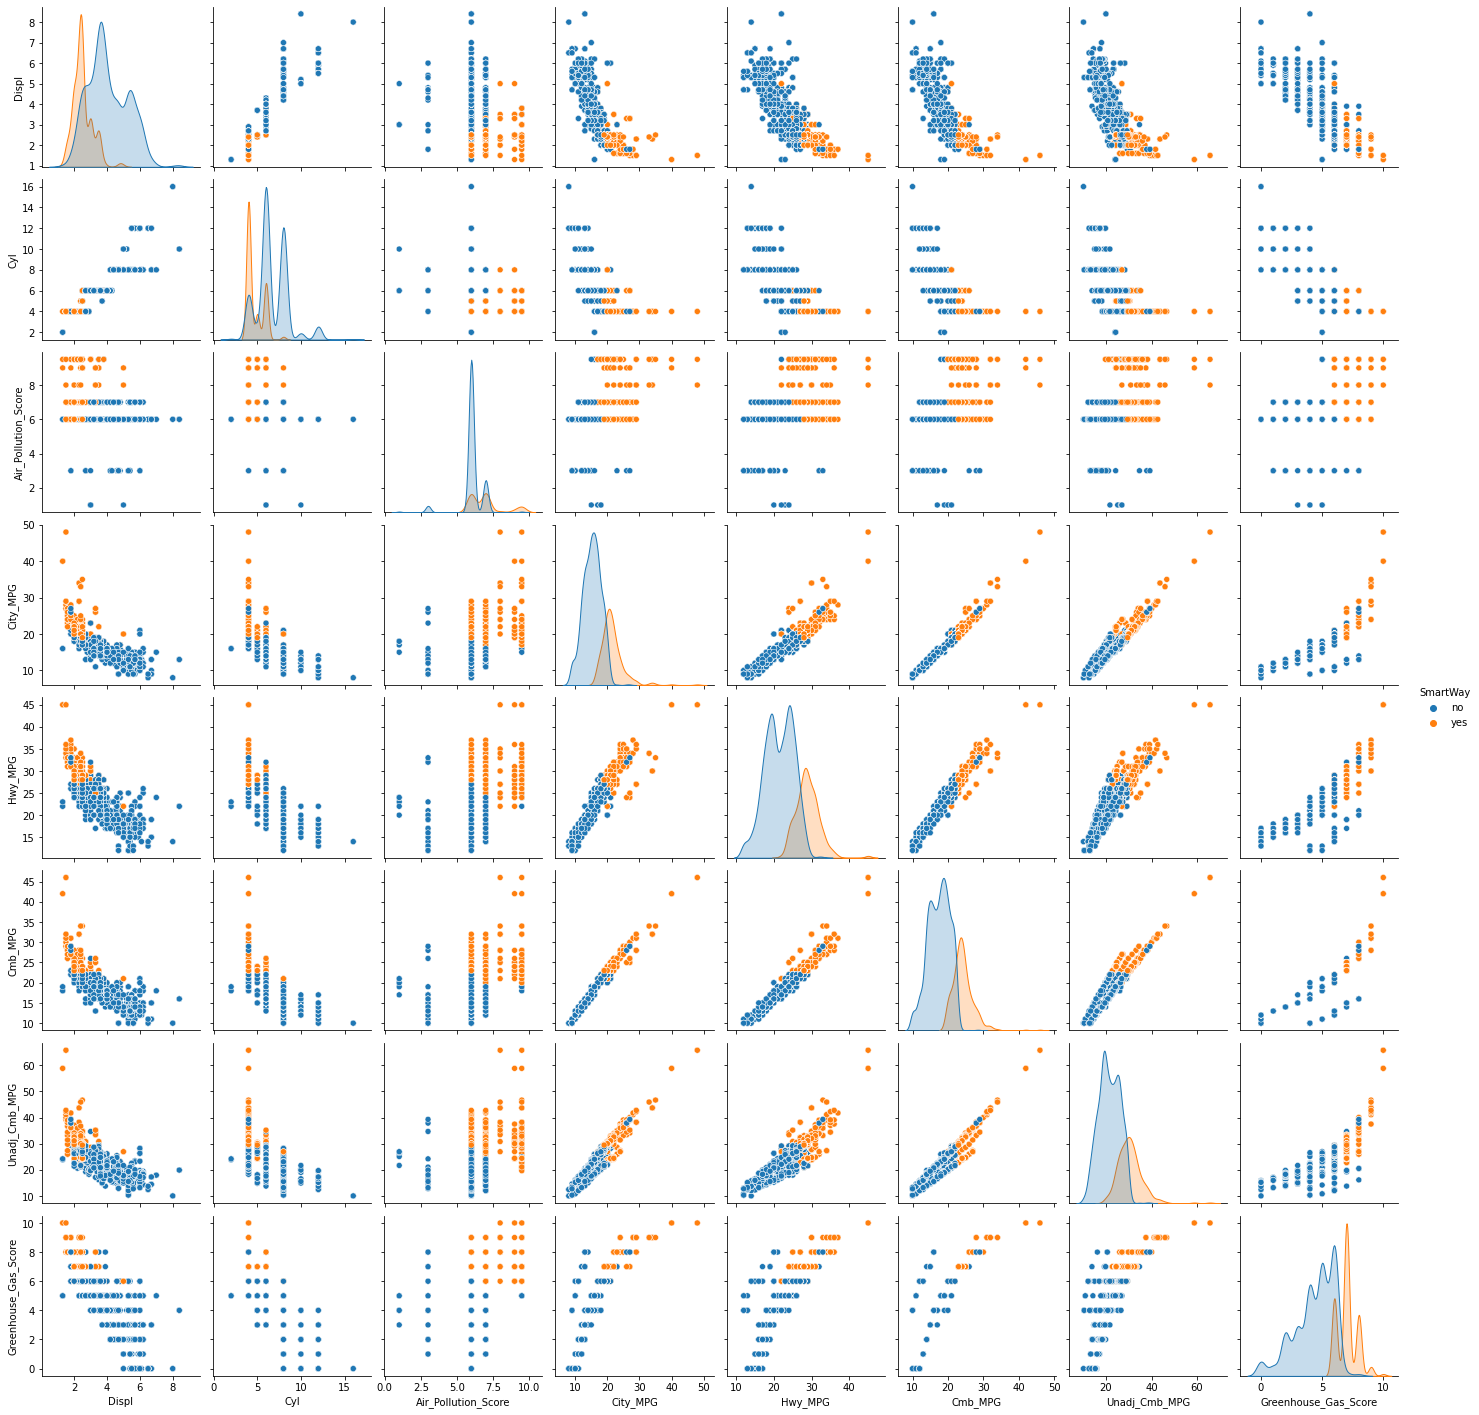

In [93]:
sns.pairplot(df,hue='SmartWay')

The pairplot above indicate strong positive correlation between columns and strong negative correlation between some columns

Text(0.5, 1.0, 'GRAPH OF VEHICLE CLASS AGAINST GREENHOUSE_GAS_SCORE ')

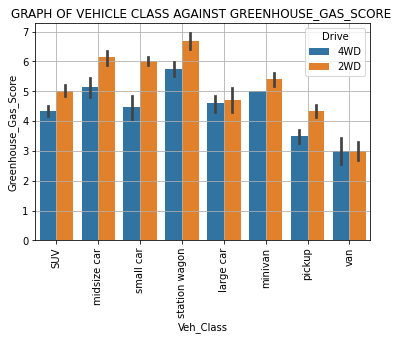

In [108]:
sns.barplot(data=df,x='Veh_Class',y='Greenhouse_Gas_Score',hue='Drive')
plt.xticks(rotation=90)
plt.grid('darkgrid')
plt.title("Graph of Vehicle class against Greenhouse_Gas_Score ".upper())

The graph above indicate that station wagon that have 2WD drives emit the highest amount of greenhouse  gas to the environment.  Midsize car with 2WD drives emit more greenhouse gas  to the envirinment than those of 4WD drives . Van emit the least greenhouse to the surrounding.

Text(0.5, 1.0, 'GRAPH OF DRIVE AGAINST GREENHOUSE_GAS_SCORE ')

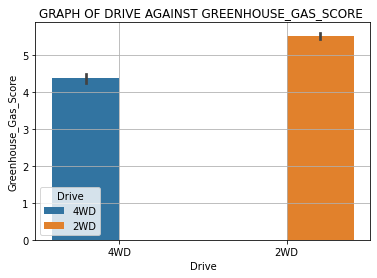

In [109]:
sns.barplot(data=df,x='Drive',y='Greenhouse_Gas_Score',hue='Drive')
plt.grid('darkgrid')
plt.title("Graph of Drive against Greenhouse_Gas_Score ".upper())

From the graph above we can conclude that  Vehicles with 4WD drives are more environmental friendly than 2WD because they emit less greenhouse gas

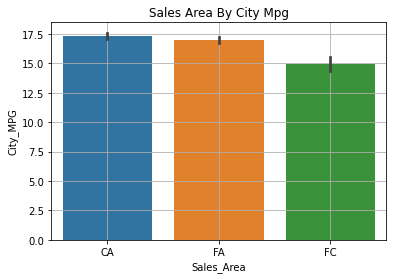

In [105]:
plt.title("Sales Area by City MPG".title())
sns.barplot(data =df,  x=df.Sales_Area, y=df.City_MPG);
plt.grid('darkgrid')


The graph above indicate that CA has the highest city Mpg followed by FA and FC 

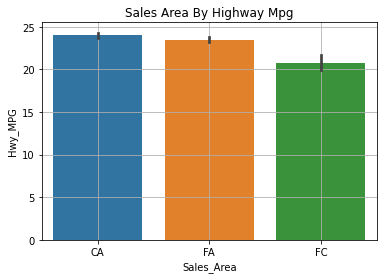

In [106]:
plt.title("Sales Area by Highway MPG".title())
sns.barplot(data = df, x = df.Sales_Area, y= df.Hwy_MPG)
plt.grid('darkgrid')

Text(0.5, 1.0, 'GRAPH OF VEHICLE CLASS AGAINST AIR_POLLUTION_SCORE ')

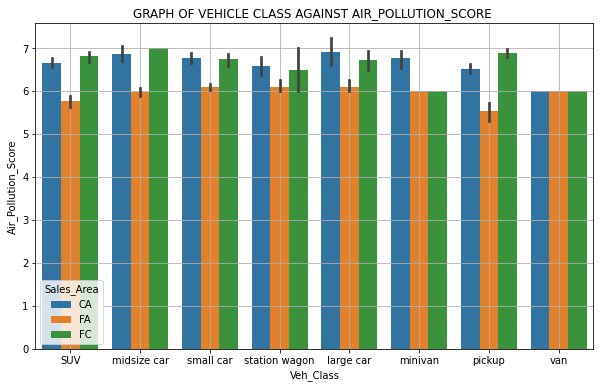

In [110]:
plt.figure(figsize=[10,6])
sns.barplot(data = df, x = df.Veh_Class, y= df.Air_Pollution_Score,hue=df.Sales_Area)
plt.grid('darkgrid')
plt.title("Graph of Vehicle class against Air_Pollution_Score ".upper())

The graph above indicate that for midsize car,FC sales area has the highest pollution score.Large car in CA also emit alot of air pollution.Pickup in Fa emit the least amount of air pollution